In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import sys
print("Current Python path:", sys.executable)


Current Python path: c:\Users\asus\AppData\Local\Programs\Python\Python311\python.exe


In [41]:
# Load Excel file
file_path = r"C:\Users\asus\Desktop\walmart\project.xlsx"
df = pd.read_excel( r"C:\Users\asus\Desktop\walmart\project.xlsx")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [ ]:
#Data Cleaning
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year for trend analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# -------------------------------

In [43]:
#Drop the row where any cell contain blank
df = df.dropna()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [ ]:
#Remove Duplicate Rows
df = df.drop_duplicates()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


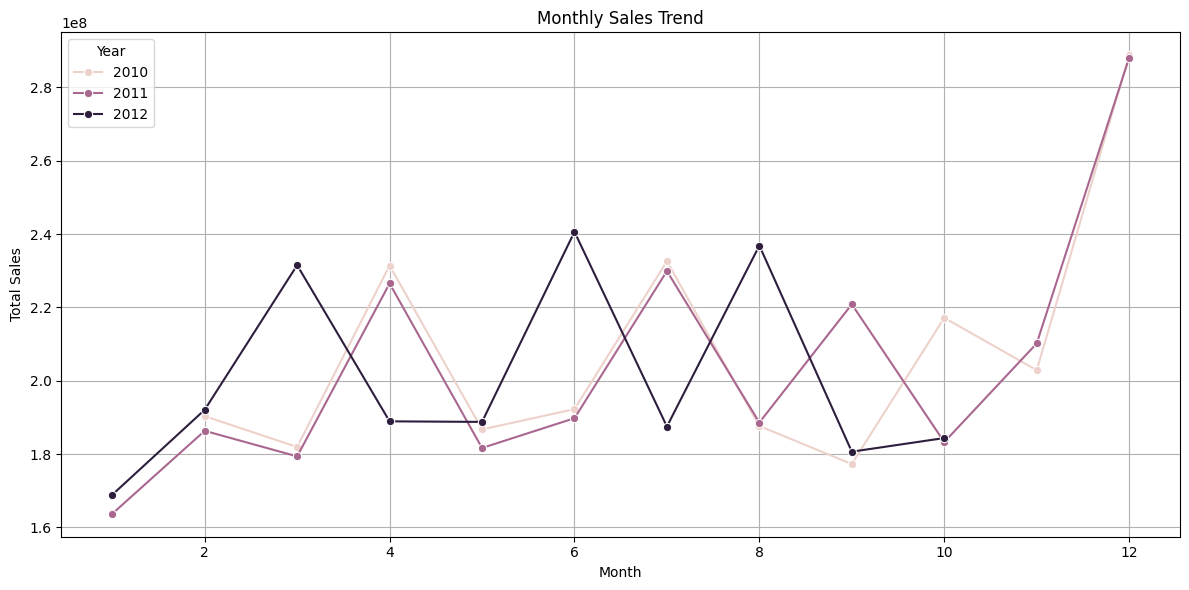

In [22]:
# 1. Monthly Sales Trend Chart
# -------------------------------
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------



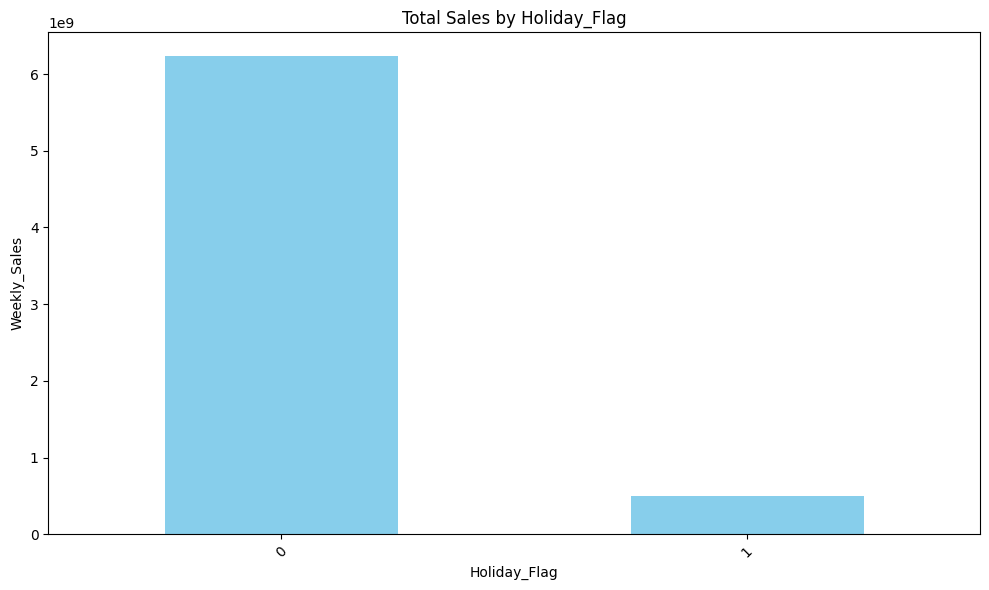

In [46]:
# 2. State-wise Sales Distribution
# -------------------------------
Holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
Holiday_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Holiday_Flag')
plt.ylabel('Weekly_Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------


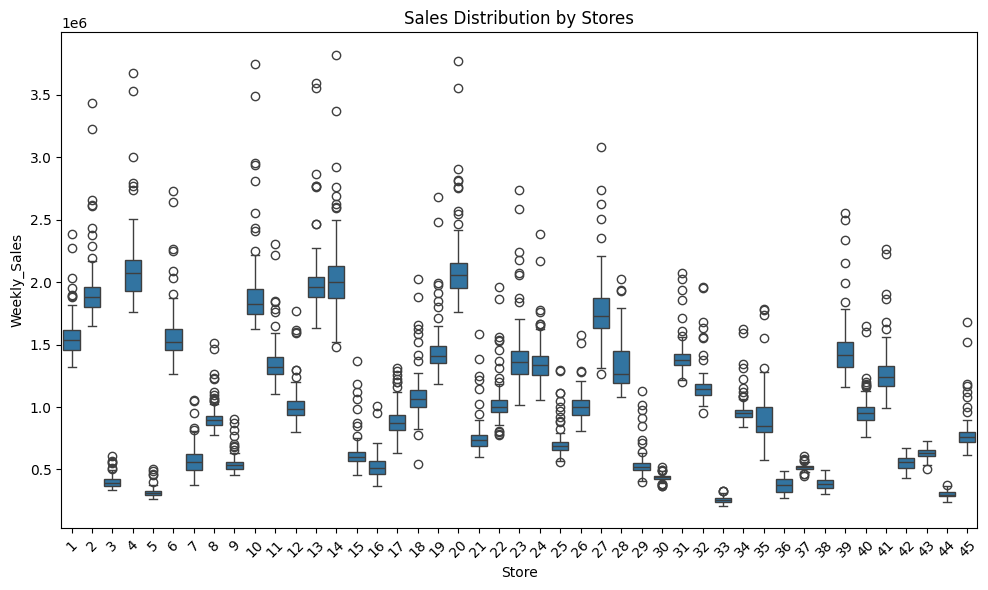

In [ ]:
# 3. Store Analysis
# -------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title('Sales Distribution by Stores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------


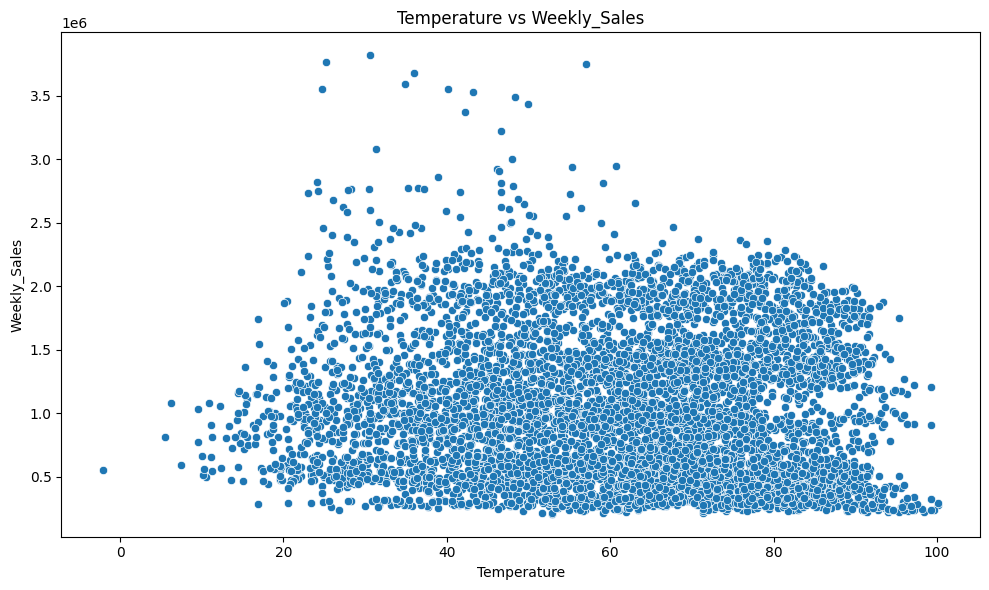

In [27]:
# 4. Temperature vs Sales (Seasonal Impact)
# -------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs Weekly_Sales')
plt.tight_layout()
plt.show()

# -------------------------------


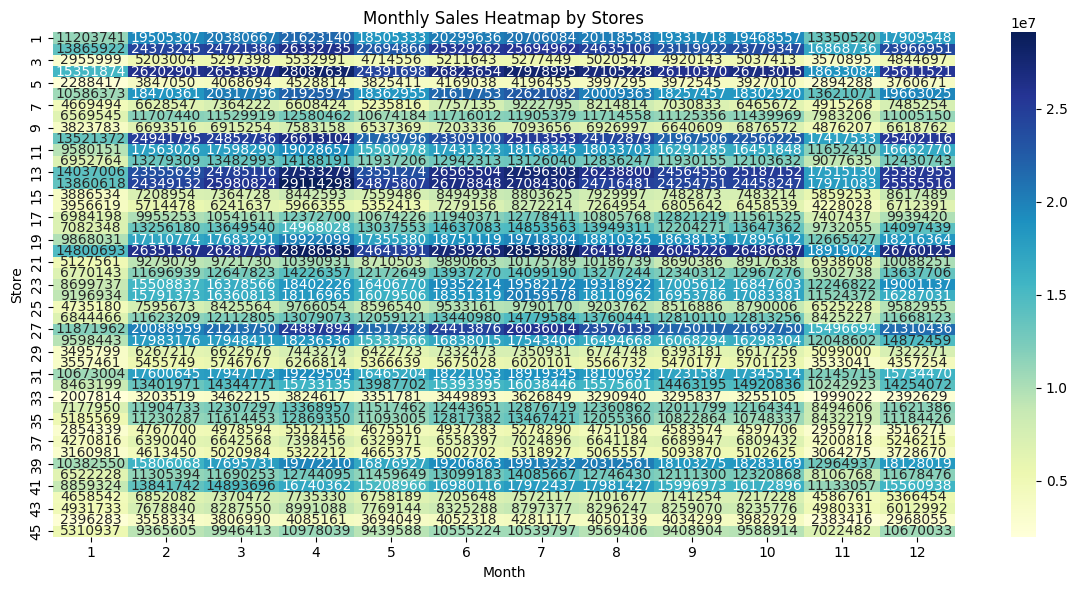

In [36]:
# 5. Heatmap of Sales by Month and Product Category
# -------------------------------
heatmap_data = df.pivot_table(index='Store', columns='Month', values='Weekly_Sales', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Monthly Sales Heatmap by Stores')
plt.tight_layout()
plt.show()

In [58]:
# High and Low Performing Sales Analysis

df['Performance'] = df['Weekly_Sales'].apply(label_performance)

# Counting how many fall into each category
performance_counts = df['Performance'].value_counts()
print("Performance Breakdown:\n", performance_counts)


# Top 5 High Performers
top_5 = df[df['Performance'] == 'High'].sort_values(by='Weekly_Sales', ascending=False).head(5)
print("🔼 Top 5 High Performing Sales:\n", top_5[['Store', 'Date', 'Weekly_Sales']])

# Bottom 5 Low Performers
bottom_5 = df[df['Performance'] == 'Low'].sort_values(by='Weekly_Sales', ascending=True).head(5)
print("\n🔽 Bottom 5 Low Performing Sales:\n", bottom_5[['Store', 'Date', 'Weekly_Sales']])


Performance Breakdown:
 Performance
Medium    5147
High       644
Low        644
Name: count, dtype: int64
🔼 Top 5 High Performing Sales:
       Store       Date  Weekly_Sales
1905     14 2010-12-24    3818686.45
2763     20 2010-12-24    3766687.43
1333     10 2010-12-24    3749057.69
527       4 2011-12-23    3676388.98
1762     13 2010-12-24    3595903.20

🔽 Bottom 5 Low Performing Sales:
       Store       Date  Weekly_Sales
4619     33 2010-12-03     209986.25
4614     33 2010-10-29     213538.32
4675     33 2011-12-30     215359.21
4623     33 2010-12-31     219804.85
4671     33 2011-12-02     220060.35


C:\Users\asus\AppData\Local\Temp\ipykernel_11944\2803791515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Performance', palette=['red','green', 'orange'])


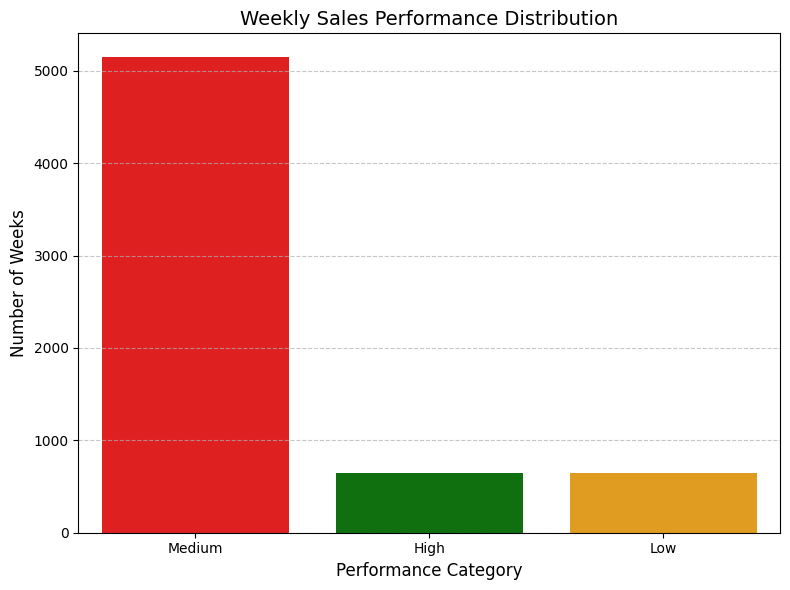

In [60]:
# Visualization of Performance Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Performance', palette=['red','green', 'orange'])
plt.title('Weekly Sales Performance Distribution', fontsize=14)
plt.xlabel('Performance Category', fontsize=12)
plt.ylabel('Number of Weeks', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)# Add grid and format layout
plt.tight_layout()
plt.show()


In [61]:
# Get correlation of numerical features with Weekly_Sales
correlation = df.corr(numeric_only=True)['Weekly_Sales'].sort_values(ascending=False)

print("🔍 Correlation of features with Weekly_Sales:\n")
print(correlation)


🔍 Correlation of features with Weekly_Sales:

Weekly_Sales    1.000000
Month           0.076143
Holiday_Flag    0.036891
Fuel_Price      0.009464
Year           -0.018378
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64


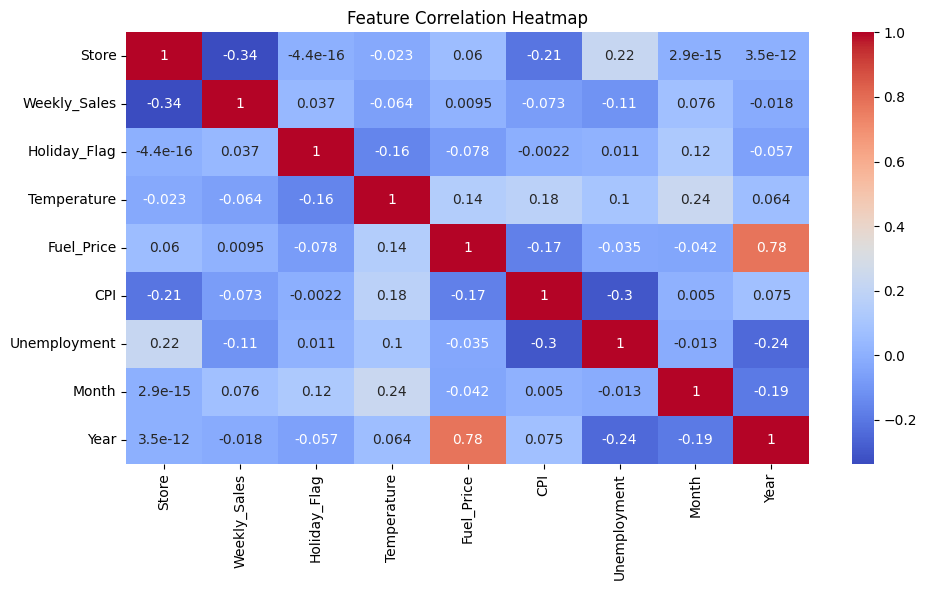

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()
#Correlation Value	Meaning	Color
#+1.0	Strong positive	🔴 Red
#+0.5	Moderate positive	🟠 Orange/pink
#0.0	No correlation	⚪ White
#-0.5	Moderate negative	🔵 Light blue
#-1.0	Strong negative	🔵 Dark blue
#CPI-Consumer Price Index